### Objective <br>

Tujuan dari proyek ini adalah untuk menganalisis pola penggunaan sepeda di Kota London tahun 2015 dan membangun model prediktif yang mampu memperkirakan jumlah peminjaman sepeda berdasarkan faktor cuaca dan waktu. Secara spesifik, proyek ini bertujuan untuk:<br>

- Melakukan eksplorasi data (EDA) guna memahami pola harian, musiman, dan jam.<br>

- Menganalisis hubungan antara variabel cuaca dan waktu terhadap jumlah penggunaan sepeda, termasuk identifikasi tren, musim, dan anomali.<br>

- Melatih dan mengevaluasi berbagai model prediktif, antara lain:<br>

  1. Linear Regression untuk baseline prediksi yang sederhana.<br>
  2. Artificial Neural Network (ANN) untuk menangkap hubungan non-linear.<br>
  3. Deep Neural Network (DNN) untuk model prediksi yang lebih kompleks.<br>

- Membandingkan performa model-model tersebut dan memilih pendekatan terbaik untuk prediksi jangka pendek/mingguan.<br>

- Memberikan insight dan rekomendasi strategis berdasarkan hasil analisis dan prediksi, yang dapat digunakan untuk pengelolaan stok sepeda, penjadwalan pemeliharaan, atau strategi pemasaran musiman.<br>

###1. Import Library

In [195]:
import pandas as pd   # Import library pandas untuk manipulasi data
import numpy as np    # Import library numpy untuk komputasi numerik
from sklearn.model_selection import train_test_split    # Import fungsi untuk membagi data menjadi training dan testing
from sklearn.preprocessing import StandardScaler    # Import scaler untuk normalisasi data
import matplotlib.pyplot as plt   # Import library visualisasi
import seaborn as sns   # Import seaborn untuk visualisasi statistik
import matplotlib.dates as mdates   # Import modul untuk formatting tanggal pada plot
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif # Import fungsi untuk menghitung Variance Inflation Factor (VIF)
from statsmodels.tools.tools import add_constant    # Import fungsi untuk menambahkan konstanta pada matriks
from sklearn.linear_model import LinearRegression   # Import model regresi linear
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # Import metrik evaluasi model
import scipy.stats as stats   # Import library statistik
import tensorflow as tf   # Import framework deep learning tensorflow
from tensorflow.keras.models import Sequential    # Import model sequential untuk arsitektur model deep learning ANN & DNN
from tensorflow.keras.layers import Dense   # Import layer dense untuk arsitektur model deep learning ANN & DNN
from tensorflow.keras.optimizers import Adam  # Import optimizer Adam
import random  # Import random untuk seed

###2. Load Data

In [196]:
# Membaca dataset dari file CSV
london_df = pd.read_csv('london bike sharing.csv')
# Menampilkan 5 baris pertama data
london_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### About the Dataset <br>

"timestamp" - timestamp field for grouping the data <br>
"cnt" - the count of a new bike shares <br>
"t1" - real temperature in C <br>
"t2" - temperature in C "feels like"<br>
"hum" - humidity in percentage<br>
"wind_speed" - wind speed in km/h<br>
"weather_code" - category of the weather<br>
"is_holiday" - boolean field - 1 holiday / 0 non holiday<br>
"is_weekend" - boolean field - 1 if the day is weekend<br>
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br>


"weathe_code" category description:<br>
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br>
2 = scattered clouds / few clouds<br>
3 = Broken clouds<br>
4 = Cloudy<br>
7 = Rain/ light Rain shower/ Light rain <br>
10 = rain with thunderstorm<br>
26 = snowfall<br>
94 = Freezing Fog

###3. Data Pre-Processing / Data Cleaning

In [197]:
# Mengubah kolom timestamp menjadi format datetime
london_df['timestamp'] = pd.to_datetime(london_df['timestamp'])

# Filter data hanya untuk tahun 2015
df = london_df[london_df['timestamp'].dt.year == 2015]

# Menampilkan jumlah data tahun 2015
print(f"Jumlah data tahun 2015: {len(df)}")

# Menampilkan 5 baris pertama data
df.head()

Jumlah data tahun 2015: 8643


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [198]:
# Menampilkan summary dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8643 entries, 0 to 8642
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     8643 non-null   datetime64[ns]
 1   cnt           8643 non-null   int64         
 2   t1            8643 non-null   float64       
 3   t2            8643 non-null   float64       
 4   hum           8643 non-null   float64       
 5   wind_speed    8643 non-null   float64       
 6   weather_code  8643 non-null   float64       
 7   is_holiday    8643 non-null   float64       
 8   is_weekend    8643 non-null   float64       
 9   season        8643 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 742.8 KB


In [199]:
# Mengecek missing values pada tiap kolom
print(df.isnull().sum())

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


### 4. Feature Engineering

In [200]:
# Menambahkan fitur waktu baru
df['hour'] = df['timestamp'].dt.hour    # Ekstrak jam dari timestamp
df['day'] = df['timestamp'].dt.day_name()   # Ekstrak nama hari dari timestamp
df['month'] = df['timestamp'].dt.month    # Ekstrak bulan dari timestamp

# Agregasi data harian dengan resample
daily_data = df.set_index('timestamp').resample('D').sum(numeric_only=True)

<ipython-input-200-970f2e2813ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['timestamp'].dt.hour    # Ekstrak jam dari timestamp
<ipython-input-200-970f2e2813ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['timestamp'].dt.day_name()   # Ekstrak nama hari dari timestamp
<ipython-input-200-970f2e2813ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [201]:
# Mapping nama hari ke angka (0 = Monday, 6 = Sunday)
day_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Menerapkan mapping ke kolom day
df['day_num'] = df['day'].map(day_map)

<ipython-input-201-2a459aa52fd9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_num'] = df['day'].map(day_map)


In [202]:
# Menampilkan 5 baris pertama setelah transformasi
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,day_num
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,Sunday,1,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,Sunday,1,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,Sunday,1,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,Sunday,1,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,Sunday,1,6


In [203]:
# Menampilkan info dataframe setelah transformasi
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8643 entries, 0 to 8642
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     8643 non-null   datetime64[ns]
 1   cnt           8643 non-null   int64         
 2   t1            8643 non-null   float64       
 3   t2            8643 non-null   float64       
 4   hum           8643 non-null   float64       
 5   wind_speed    8643 non-null   float64       
 6   weather_code  8643 non-null   float64       
 7   is_holiday    8643 non-null   float64       
 8   is_weekend    8643 non-null   float64       
 9   season        8643 non-null   float64       
 10  hour          8643 non-null   int32         
 11  day           8643 non-null   object        
 12  month         8643 non-null   int32         
 13  day_num       8643 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int32(2), int64(2), object(1)
memory usage: 945.3+ KB


###5. Exploratory Data Analysis

In [204]:
# Menampilkan statistik deskriptif
df.describe()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,day_num
count,8643,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000
mean,2015-07-03 16:43:57.001041152,1126.778433,12.619981,11.742624,71.363387,16.669029,2.749393,0.019438,0.284392,1.476686,11.509314,6.562536,2.993058
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2015-04-04 07:30:00,265.000000,9.000000,7.000000,62.000000,11.000000,1.000000,0.000000,0.000000,0.000000,6.000000,4.000000,1.000000
50%,2015-07-03 12:00:00,832.000000,13.000000,13.000000,73.000000,16.000000,2.000000,0.000000,0.000000,1.000000,12.000000,7.000000,3.000000
75%,2015-10-02 01:30:00,1636.000000,16.000000,16.000000,82.000000,21.500000,3.000000,0.000000,1.000000,2.000000,17.000000,10.000000,5.000000
max,2015-12-31 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,23.000000,12.000000,6.000000
std,NaN,1063.963482,5.205448,6.258280,14.346216,8.052332,2.389691,0.138065,0.451150,1.113967,6.914661,3.424610,2.002301


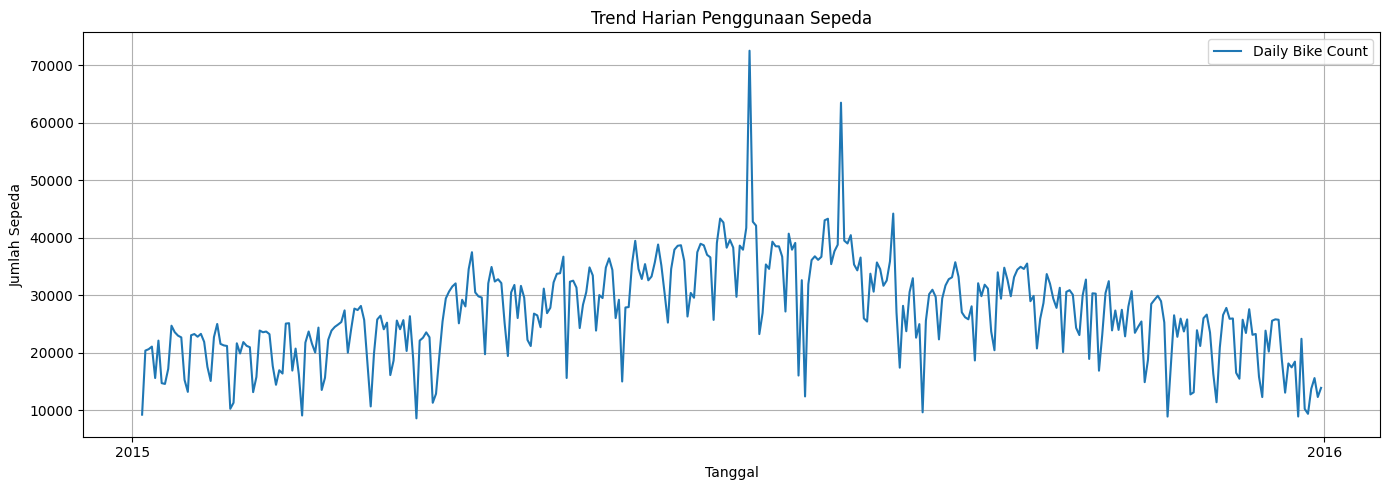

In [205]:
# Visualisasi tren harian penggunaan sepeda
plt.figure(figsize=(14, 5)) # Membuat figure/plot dengan ukuran 14x5 inci

# Membuat line plot dengan:
# - daily_data.index sebagai sumbu x (tanggal)
# - daily_data['cnt'] sebagai sumbu y (jumlah sepeda harian)
# - label 'Daily Bike Count' untuk legenda
plt.plot(daily_data.index, daily_data['cnt'], label='Daily Bike Count')
plt.title('Trend Harian Penggunaan Sepeda')   # Menambahkan judul plot
plt.xlabel('Tanggal')   # Label untuk sumbu x (tanggal)
plt.ylabel('Jumlah Sepeda')   # Label untuk sumbu y (jumlah sepeda)

# Konfigurasi format tanggal pada sumbu x:
# - YearLocator() untuk menandai lokasi tahun
# - DateFormatter('%Y') untuk menampilkan format tahun 4-digit
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid()  # Menambahkan grid untuk memudahkan pembacaan data
plt.legend()  # Menampilkan legenda
plt.tight_layout()  # Menyesuaikan layout secara otomatis agar tidak ada elemen yang terpotong
plt.show()  # Menampilkan plot

Interpretasi Trend : <br>
- Terlihat adanya peningkatan jumlah sepeda yang signifikan mulai dari awal tahun hingga sekitar pertengahan tahun (kemungkinan musim semi/musim panas). <br>

- Ini bisa disebabkan oleh cuaca yang lebih baik atau musim liburan, di mana orang lebih sering menggunakan sepeda.

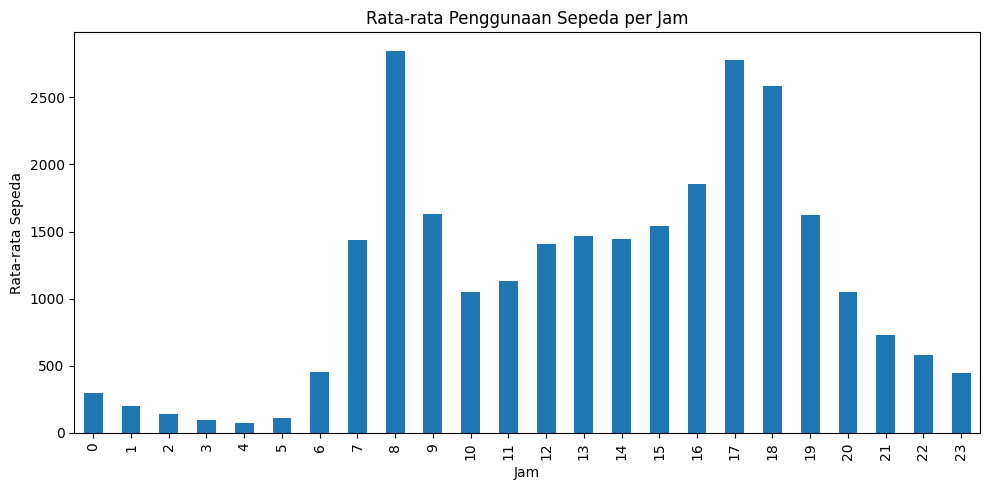

In [206]:
# Visualisasi rata-rata penggunaan per jam
plt.figure(figsize=(10, 5))   # Membuat figure/plot dengan ukuran 10x5 inci

# Membuat visualisasi data:
# 1. df.groupby('hour')['cnt'].mean() melakukan:
#    - Pengelompokan data berdasarkan kolom 'hour' (0-23)
#    - Mengambil kolom 'cnt' (jumlah sepeda)
#    - Menghitung nilai rata-rata untuk setiap jam
# 2. .plot(kind='bar') membuat diagram batang dari hasil perhitungan
df.groupby('hour')['cnt'].mean().plot(kind='bar')
plt.title('Rata-rata Penggunaan Sepeda per Jam')  # Menambahkan judul plot
plt.xlabel('Jam')   # Menambahkan label sumbu x
plt.ylabel('Rata-rata Sepeda')  # Menambahkan label sumbu y
plt.tight_layout()  # Menyesuaikan layout secara otomatis
plt.show()  # Menampilkan plot

Interpretasi Pola Penggunaan: <br>
- Puncak Pagi Hari (Jam 8), terdapat lonjakan tertinggi pada jam 8 pagi, kemungkinan besar karena orang-orang berangkat kerja atau sekolah.<br>
- Jam Tengah Hari (11–15), aktivitas cukup stabil tapi tidak setinggi pagi/sore. Bisa jadi karena aktivitas santai, makan siang, atau penggunaan rekreasional.<br>
- Puncak Sore Hari (Jam 17–18), ada puncak kedua pada jam 17 dan 18, menunjukkan banyak orang pulang kerja atau sekolah.<br>
- Penggunaan Rendah di Malam dan Dini Hari (Jam 0–5), hampir tidak ada aktivitas bersepeda pada jam-jam ini, wajar karena waktu istirahat/tidur.


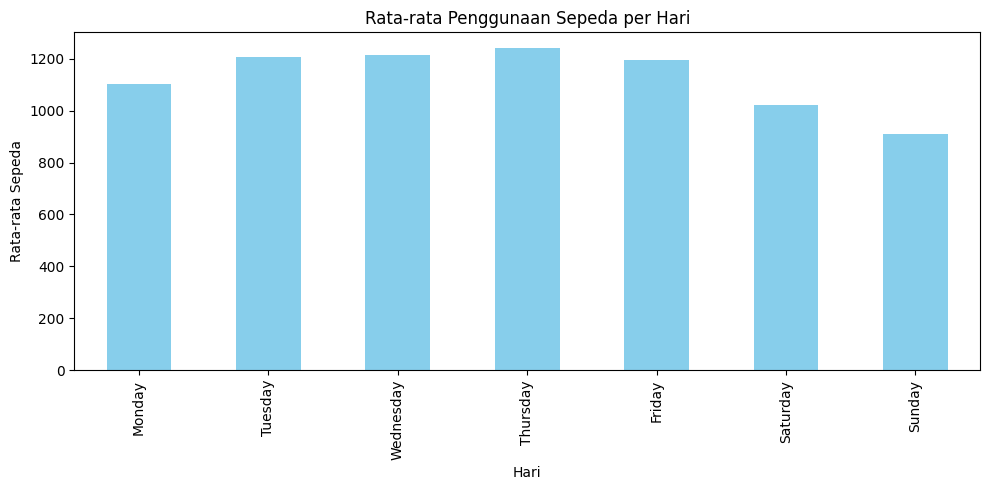

In [207]:
# Visualisasi rata-rata penggunaan per hari
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  # Membuat urutan hari dalam seminggu sesuai kalender
plt.figure(figsize=(10, 5))   # Membuat figure/plot dengan ukuran 10x5 inci

# Membuat visualisasi data dengan proses:
# 1. df.groupby('day')['cnt'].mean() menghasilkan:
#    - Rata-rata penggunaan sepeda per hari
#    - Data awal belum terurut (acak berdasarkan urutan muncul di dataset)
# 2. .reindex(order) mengurutkan hasil sesuai urutan hari yang telah ditetapkan
# 3. .plot(kind='bar', color='skyblue') membuat diagram batang dengan warna biru muda
df.groupby('day')['cnt'].mean().reindex(order).plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penggunaan Sepeda per Hari')   # Menambahkan judul plot
plt.xlabel('Hari')    # Label sumbu x menunjukkan nama-nama hari
plt.ylabel('Rata-rata Sepeda')    # Label sumbu y menunjukkan nilai rata-rata
plt.tight_layout()  # Menyesuaikan layout otomatis
plt.show()  # Menampilkan plot

Interpretasi Pola Harian <br>

Hari Kerja (Senin–Jumat):<br>
- Penggunaan sepeda lebih tinggi dan relatif stabil.<br>
- Puncaknya terjadi pada Kamis, dengan sedikit penurunan di Senin dan Jumat.<br>
- Hal ini menunjukkan bahwa sepeda sangat mungkin digunakan untuk aktivitas rutin seperti berangkat kerja atau sekolah.<br>


Akhir Pekan (Sabtu dan Minggu):<br>
- Penurunan signifikan terjadi pada hari Sabtu dan paling rendah pada hari Minggu. Mungkin karena orang tidak bekerja/sekolah, sehingga tidak menggunakan sepeda untuk keperluan harian dan Lebih memilih beristirahat atau beraktivitas di rumah.

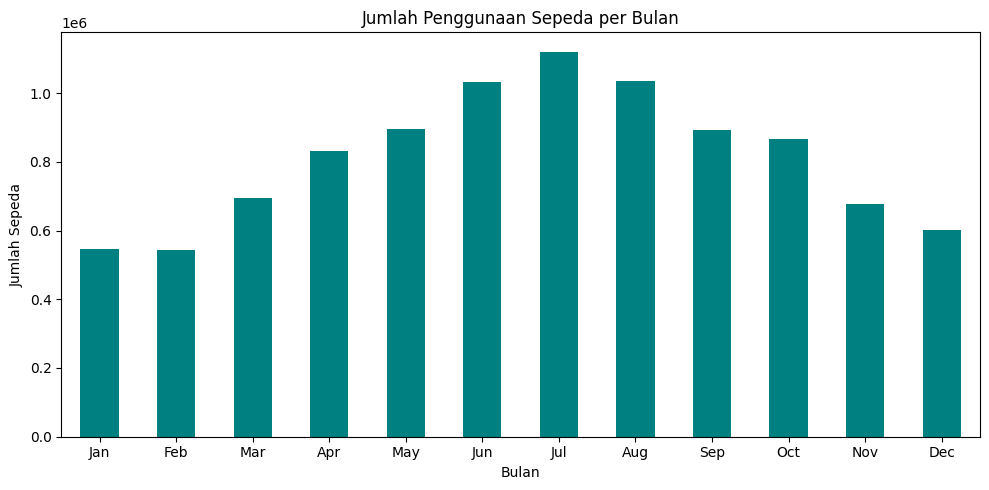

In [208]:
# Visualisasi penggunaan sepeda per bulan
monthly_count = df.groupby('month')['cnt'].sum() # Menghitung total penggunaan sepeda per bulan

plt.figure(figsize=(10, 5)) # Membuat figure/plot dengan ukuran 10x5 inci

# Membuat bar plot dengan:
# - Data dari monthly_count (total sepeda per bulan)
# - Jenis plot 'bar' (diagram batang)
# - Warna 'teal' (warna biru-hijau yang profesional)
monthly_count.plot(kind='bar', color='teal')
plt.title("Jumlah Penggunaan Sepeda per Bulan")   # Menambahkan judul plot
plt.xlabel("Bulan")   # Label untuk sumbu x (nama-nama bulan)
plt.ylabel("Jumlah Sepeda")   # Label untuk sumbu y (total jumlah sepeda)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)   # Mengatur ticks dan label pada sumbu x
plt.tight_layout()    # Menyesuaikan layout secara otomatis
plt.show()  # Menampilkan plot

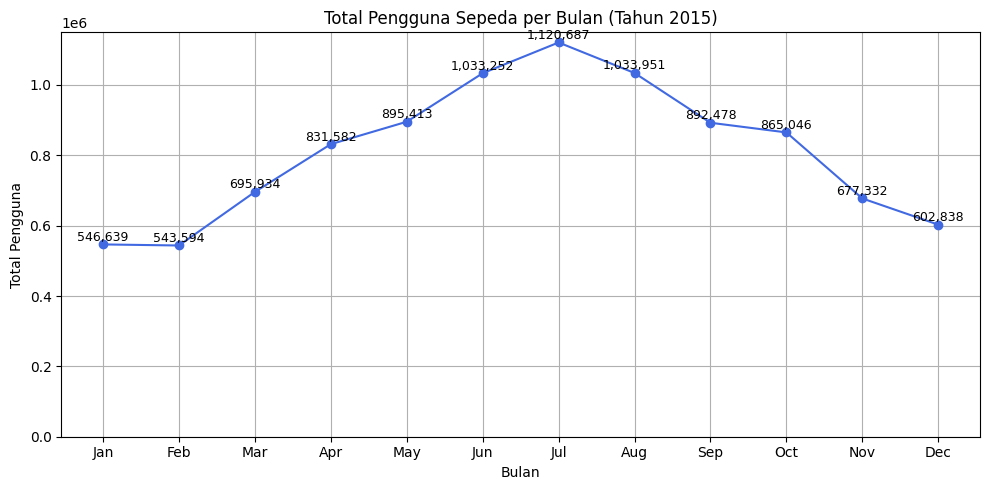

In [209]:
# Membuat figure dengan ukuran 10x5 inci
plt.figure(figsize=(10, 5))

# Membuat line plot dengan:
# - monthly_count.index sebagai sumbu x (nilai bulan 1-12)
# - monthly_count.values sebagai sumbu y (total sepeda)
# - marker='o' untuk menampilkan titik di setiap data point
# - warna royalblue
plt.plot(monthly_count.index, monthly_count.values, marker='o', color='royalblue')
plt.title('Total Pengguna Sepeda per Bulan (Tahun 2015)')   # Menambahkan judul plot
plt.xlabel('Bulan')   # Label sumbu x
plt.ylabel('Total Pengguna')    # Label sumbu y

# Mengatur ticks dan label sumbu x:
# - ticks pada posisi 1-12 (untuk 12 bulan)
# - label berupa singkatan nama bulan
# - rotation=0 untuk memastikan label horizontal
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(True)    # Menambahkan grid untuk memudahkan pembacaan nilai
plt.ylim(bottom=0)  # Mulai sumbu Y dari nol

# Menambahkan label nilai di atas setiap titik plot
for i, value in enumerate(monthly_count.values):
    # Menempatkan text di:
    # - x = posisi bulan (i+1 karena index dimulai dari 0)
    # - y = nilai sepeda + 10000 (agar text tidak menumpuk dengan garis)
    # - format :, untuk separator ribuan
    # horizontal alignment center
    # ukuran font 9
    plt.text(x=i+1, y=value + 10000, s=f"{value:,}", ha='center', fontsize=9)

plt.tight_layout()  # Menyesuaikan layout
plt.show()    # Menampilkan plot


Interpretasi Pola Musiman
- Musim Puncak (Apr–Aug), penggunaan sepeda meningkat tajam mulai Maret, dan mencapai puncak tertinggi pada Juli, Ini sangat mungkin berkaitan dengan cuaca yang lebih hangat (musim semi dan musim panas), libur sekolah dan lebih banyak kegiatan luar ruangan.

- Musim Rendah (Jan–Feb & Nov–Dec), penggunaan sepeda paling rendah pada bulan Januari dan Februari, dan kembali menurun di bulan November dan Desember Kemungkinan karena cuaca dingin atau hujan, aktivitas luar ruangan berkurang di musim dingin atau akhir tahun.

- Transisi (Sep–Oct), ada penurunan bertahap setelah puncak musim panas, ini bisa menunjukkan transisi ke musim gugur, di mana cuaca mulai mendingin.

Musim di London tahun 2015 menurut Cestee.id: <br>
- Musim Dingin:<br>
Musim dingin di London, yang berlangsung dari Desember hingga Februari, dikenal sebagai musim terdingin dengan suhu beku, kemungkinan es, dan terkadang salju. Pada tahun 2015, musim dingin sangat ekstrem dengan suhu yang sangat dingin.<br>
- Musim Semi:<br>
Musim semi (Maret hingga Mei) di London seringkali memiliki cuaca yang tidak menentu, dengan banyak hari mendung dan hujan.<br>
- Musim Panas:<br>
Musim panas (Juni hingga Agustus) di London bisa cukup hangat, dengan suhu rata-rata sekitar 24°C, meskipun ada hari-hari yang bisa lebih panas. Namun, suhu di atas 30°C jarang terjadi, hanya terjadi sekitar 3 tahun sekali. Curah hujan tetap ada di musim panas.<br>
- Musim Gugur:<br>
Musim gugur (September hingga November) di London biasanya memiliki cuaca yang dingin, mendung, dan banyak hujan.

<ipython-input-210-f6de48964e4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season_name'] = df['season'].map({


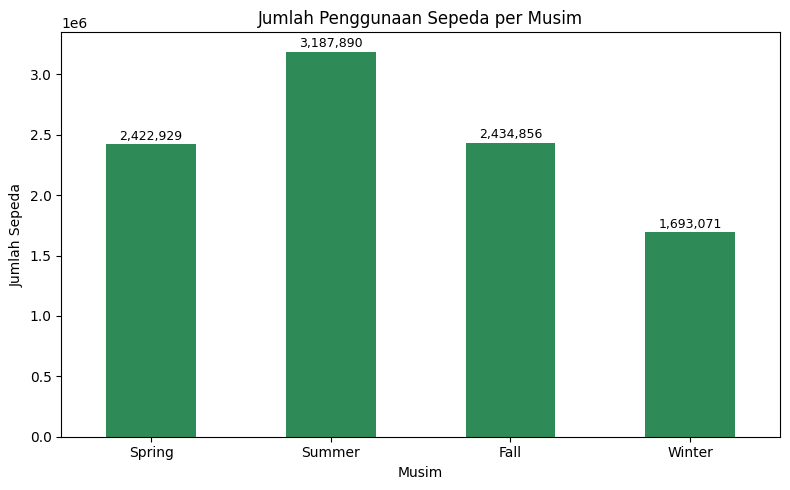

In [210]:
# Membuat kolom baru 'season_name' dengan mapping nilai numerik ke nama musim
df['season_name'] = df['season'].map({
    0: 'Spring',
    1: 'Summer',
    2: 'Fall',
    3: 'Winter'
})

# Menghitung total penggunaan sepeda per musim dan mengurutkan sesuai urutan musim
season_count = df.groupby('season_name')['cnt'].sum().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# Membuat figure baru ukuran 8x5 inci
plt.figure(figsize=(8, 5))

# Membuat bar plot dengan:
# - Data dari season_count
# - Jenis plot bar
# - Warna seagreen
season_count.plot(kind='bar', color='seagreen')
plt.title("Jumlah Penggunaan Sepeda per Musim") # Judul plot
plt.xlabel("Musim") # Label sumbu x
plt.ylabel("Jumlah Sepeda") # Label sumbu y
plt.xticks(rotation=0)  # Mengatur rotasi label x menjadi 0 (horizontal)

# Menambahkan label nilai di atas setiap bar
for i, value in enumerate(season_count.values):
    # Posisi x (indeks musim), Posisi y (nilai + offset), Text nilai dengan format ribuan, Posisi horizontal center, Posisi vertical bottom, Ukuran font
    plt.text(x=i, y=value + 10000, s=f"{value:,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()  # Menyesuaikan layout
plt.show()   # Menampilkan plot

Interpretasi Musiman: <br>
- Puncak Tertinggi: Summer (Musim Panas)<br>

Jumlah penggunaan sepeda paling tinggi terjadi saat musim panas. Kemungkinan besar karena cuaca hangat dan cerah, mendukung aktivitas luar ruangan, banyak orang berlibur dan lebih aktif secara fisik.<br>

- Spring dan Fall (Semi & Gugur):<br>

Kedua musim ini memiliki jumlah penggunaan sepeda yang cukup tinggi dan hampir seimbang. Meskipun tidak seideal musim panas, cuaca masih cukup mendukung.<br>

- Winter (Musim Dingin):<br>

Penggunaan sepeda paling rendah terjadi pada musim dingin. Faktor utama kemungkinan adalah cuaca ekstrem (salju, suhu dingin), kurangnya kenyamanan dan keamanan untuk bersepeda.

###6. Deteksi Outlier

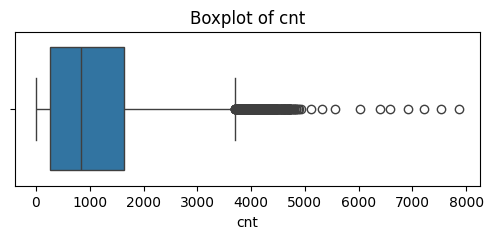

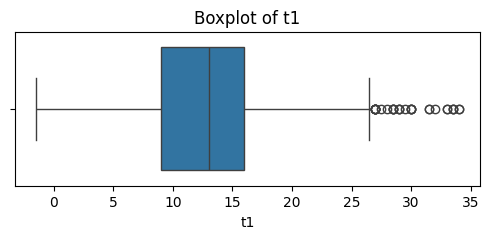

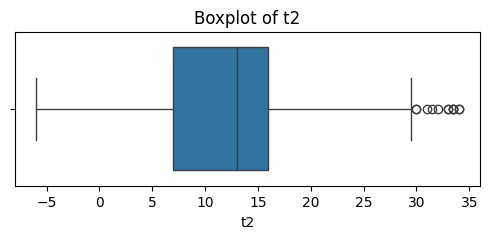

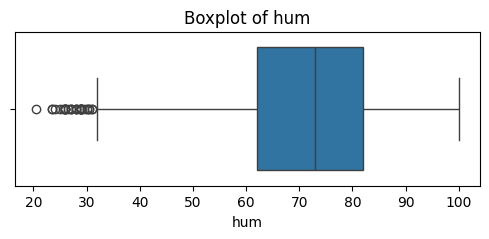

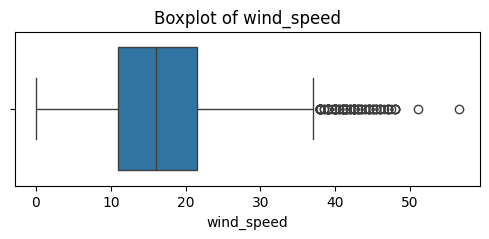

In [211]:
# List kolom yang akan dianalisis outlier-nya
features_to_check = ['cnt', 't1', 't2', 'hum', 'wind_speed']

# Loop untuk membuat boxplot setiap fitur
for feature in features_to_check:
    plt.figure(figsize=(6, 2))  # Membuat figure ukuran 6x2 inci (sempit untuk boxplot vertikal)
    sns.boxplot(x=df[feature])  # Membuat boxplot
    plt.title(f'Boxplot of {feature}')  # Judul plot dengan nama fitur
    plt.show()  # Menampilkan plot

In [212]:
# Fungsi untuk mendeteksi outlier dengan IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Quartile 1 (25%)
    Q3 = df[column].quantile(0.75)  # Quartile 3 (75%)
    IQR = Q3 - Q1   # Inter Quartile Range
    lower_bound = Q1 - 1.5 * IQR    # Batas bawah outlier
    upper_bound = Q3 + 1.5 * IQR    # Batas atas outlier

    # Filter baris yang mengandung outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Mendeteksi dan menampilkan outlier untuk setiap fitur
for feature in features_to_check:
    outliers = detect_outliers_iqr(df, feature)
    print(f"\n Outlier di kolom '{feature}':")
    if not outliers.empty:
        print(outliers[['timestamp', feature]])
    else:
        print("Tidak ada outlier.")


 Outlier di kolom 'cnt':
               timestamp   cnt
223  2015-01-13 08:00:00  3960
247  2015-01-14 08:00:00  3904
391  2015-01-20 08:00:00  3700
439  2015-01-22 08:00:00  3828
559  2015-01-27 08:00:00  3835
...                  ...   ...
8127 2015-12-10 08:00:00  4091
8219 2015-12-14 08:00:00  3761
8243 2015-12-15 08:00:00  3722
8267 2015-12-16 08:00:00  3771
8291 2015-12-17 08:00:00  3910

[347 rows x 2 columns]

 Outlier di kolom 't1':
               timestamp    t1
4155 2015-06-26 14:00:00  27.0
4249 2015-06-30 12:00:00  27.0
4250 2015-06-30 13:00:00  28.5
4251 2015-06-30 14:00:00  29.0
4252 2015-06-30 15:00:00  28.5
4253 2015-06-30 16:00:00  28.5
4254 2015-06-30 17:00:00  27.0
4270 2015-07-01 09:00:00  27.0
4271 2015-07-01 10:00:00  30.0
4272 2015-07-01 11:00:00  33.0
4273 2015-07-01 12:00:00  32.0
4274 2015-07-01 13:00:00  31.5
4275 2015-07-01 14:00:00  33.0
4276 2015-07-01 15:00:00  33.5
4277 2015-07-01 16:00:00  33.5
4278 2015-07-01 17:00:00  34.0
4279 2015-07-01 18:00:00  

Interpretasi : <br>
saya memutuskan nilai yang terlalu ekstrim yaitu :<br>
cnt >= 5000<br>
t1 >= 27 <br>
hum <= 22<br>
wind_speed >= 50<br>

dan akan diatasi dengan menghapusnya.

In [213]:
# Tampilkan 5 baris dataframe
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,day_num,season_name
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,Sunday,1,6,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,Sunday,1,6,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,Sunday,1,6,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,Sunday,1,6,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,Sunday,1,6,Winter


In [214]:
# Tampilkan summary dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8643 entries, 0 to 8642
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     8643 non-null   datetime64[ns]
 1   cnt           8643 non-null   int64         
 2   t1            8643 non-null   float64       
 3   t2            8643 non-null   float64       
 4   hum           8643 non-null   float64       
 5   wind_speed    8643 non-null   float64       
 6   weather_code  8643 non-null   float64       
 7   is_holiday    8643 non-null   float64       
 8   is_weekend    8643 non-null   float64       
 9   season        8643 non-null   float64       
 10  hour          8643 non-null   int32         
 11  day           8643 non-null   object        
 12  month         8643 non-null   int32         
 13  day_num       8643 non-null   int64         
 14  season_name   8643 non-null   object        
dtypes: datetime64[ns](1), float64(8), int32(2),

In [215]:
# Mendefinisikan kriteria outlier yang terlalu extreme untuk setiap kolom
outliers_cnt = df[df['cnt'] >= 5000]  # Outlier jumlah sepeda
outliers_t1 = df[df['t1'] >= 27.0]    # Outlier suhu
outliers_hum = df[df['hum'] <= 22]    # Outlier kelembaban udara
outliers_wind = df[df['wind_speed'] >= 50]    # Outlier kecepatan angin

# Tampilkan outlier jumlah sepeda
outliers_cnt

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,day_num,season_name
4446,2015-07-08 17:00:00,5560,20.0,20.0,53.0,30.0,2.0,0.0,0.0,1.0,17,Wednesday,7,2,Summer
4460,2015-07-09 07:00:00,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0,7,Thursday,7,3,Summer
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0,8,Thursday,7,3,Summer
4469,2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1.0,0.0,0.0,1.0,16,Thursday,7,3,Summer
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0,17,Thursday,7,3,Summer
4471,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,0.0,0.0,1.0,18,Thursday,7,3,Summer
5129,2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7.0,0.0,0.0,1.0,8,Thursday,8,3,Summer
5137,2015-08-06 16:00:00,5112,23.0,23.0,53.0,19.5,2.0,0.0,0.0,1.0,16,Thursday,8,3,Summer
5138,2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2.0,0.0,0.0,1.0,17,Thursday,8,3,Summer
5139,2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,2.0,0.0,0.0,1.0,18,Thursday,8,3,Summer


In [216]:
# Tampilkan 5 baris pertama outlier suhu
outliers_t1.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,day_num,season_name
4155,2015-06-26 14:00:00,1880,27.0,27.0,39.0,19.5,1.0,0.0,0.0,1.0,14,Friday,6,4,Summer
4249,2015-06-30 12:00:00,1657,27.0,26.0,24.0,11.0,1.0,0.0,0.0,1.0,12,Tuesday,6,1,Summer
4250,2015-06-30 13:00:00,1845,28.5,27.0,20.5,13.0,1.0,0.0,0.0,1.0,13,Tuesday,6,1,Summer
4251,2015-06-30 14:00:00,1783,29.0,28.0,26.0,15.0,1.0,0.0,0.0,1.0,14,Tuesday,6,1,Summer
4252,2015-06-30 15:00:00,2031,28.5,27.5,35.0,20.5,1.0,0.0,0.0,1.0,15,Tuesday,6,1,Summer


In [217]:
# Tampilkan jumlah outlier suhu
print('total outlier kolom t1:')
print(len(outliers_t1))

total outlier kolom t1:
31


In [218]:
# Tampilkan outlier kelembaban udara
outliers_hum

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,day_num,season_name
4250,2015-06-30 13:00:00,1845,28.5,27.0,20.5,13.0,1.0,0.0,0.0,1.0,13,Tuesday,6,1,Summer


In [219]:
# Tampilkan outlier kecepatan angin
outliers_wind

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,day_num,season_name
7596,2015-11-17 20:00:00,934,15.0,15.0,59.0,51.0,3.0,0.0,0.0,2.0,20,Tuesday,11,1,Fall
7597,2015-11-17 21:00:00,644,15.0,15.0,59.0,56.5,3.0,0.0,0.0,2.0,21,Tuesday,11,1,Fall


In [220]:
# Langsung hapus baris yang mengandung outlier terlalu extreme dengan kriteria yang telah ditentukan
df.drop(df[df['cnt'] >= 5000].index, inplace=True)  # Hapus outlier cnt >=5000
df.drop(df[df['t1'] >= 27.0].index, inplace=True)   # Hapus outlier t1 >=27.0
df.drop(df[df['hum'] <= 22].index, inplace=True)    # Hapus outlier hum <=22
df.drop(df[df['wind_speed'] >= 50].index, inplace=True) # Hapus outlier wind_speed >=50

<ipython-input-220-b6710cc5f539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['cnt'] >= 5000].index, inplace=True)  # Hapus outlier cnt >=5000
<ipython-input-220-b6710cc5f539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['t1'] >= 27.0].index, inplace=True)   # Hapus outlier t1 >=27.0
<ipython-input-220-b6710cc5f539>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['hum'] <= 22].index, i

In [221]:
# Tampilkan 5 baris dataframe setelah menghapus outlier
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,day_num,season_name
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,Sunday,1,6,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,Sunday,1,6,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,Sunday,1,6,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,Sunday,1,6,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,Sunday,1,6,Winter


In [222]:
# Tampilkan summary dataframe setelah menghapus outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8600 entries, 0 to 8642
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     8600 non-null   datetime64[ns]
 1   cnt           8600 non-null   int64         
 2   t1            8600 non-null   float64       
 3   t2            8600 non-null   float64       
 4   hum           8600 non-null   float64       
 5   wind_speed    8600 non-null   float64       
 6   weather_code  8600 non-null   float64       
 7   is_holiday    8600 non-null   float64       
 8   is_weekend    8600 non-null   float64       
 9   season        8600 non-null   float64       
 10  hour          8600 non-null   int32         
 11  day           8600 non-null   object        
 12  month         8600 non-null   int32         
 13  day_num       8600 non-null   int64         
 14  season_name   8600 non-null   object        
dtypes: datetime64[ns](1), float64(8), int32(2),

###7. Multicolinearity Checking & Handling

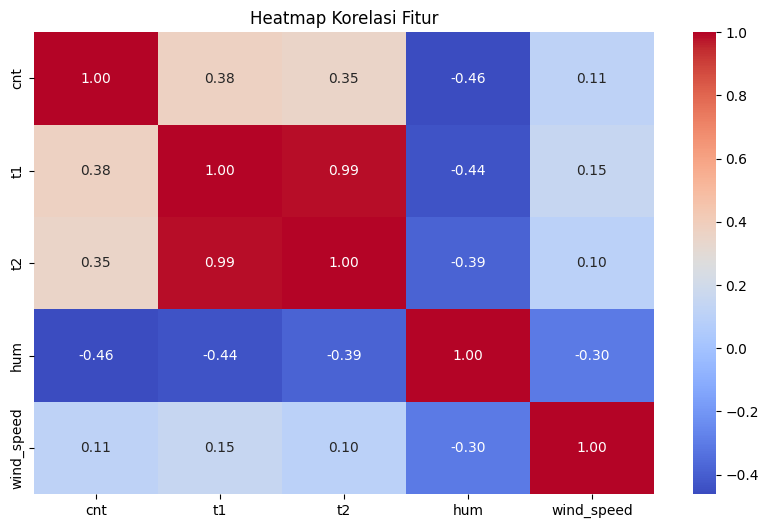

In [223]:
# Membuat heatmap korelasi antar fitur
plt.figure(figsize=(10, 6)) # Membuat figure baru ukuran 10x6 inci
sns.heatmap(df[['cnt', 't1', 't2', 'hum', 'wind_speed']].corr(), annot=True, cmap='coolwarm', fmt=".2f") # Feature yang akan dilihat korelasinya
plt.title("Heatmap Korelasi Fitur") # Tampilkan judul
plt.show()  # Tampilkan plot

Interpretasi : <br>
Fitur dengan Korelasi Tinggi (Multikolinearitas)
t1 dan t2 memiliki korelasi 0.99, yang berarti sangat redundant.<br>


Kita pertahankan salah satu yaitu t1 dan menghapus t2 sebagai feature, karena menyimpan informasi yang hampir sama. dan t1 dipertahankan karena memiliki nilai korelasi yang lebih tinggi terhadap target yaitu sebesar 0.38

In [224]:
# Memilih fitur untuk model
feature_1 = df[['t1','t2', 'hum',	'wind_speed',	'weather_code',	'is_holiday',	'is_weekend',	'season',	'hour',	'month', 'day_num']]

# Mengkonversi semua kolom ke tipe numerik (jika gagal akan NaN)
feature_1= feature_1.apply(pd.to_numeric, errors='coerce')


In [225]:
# Menghitung VIF untuk mendeteksi multikolinearitas
x = add_constant(feature_1)   # Menambahkan konstanta untuk perhitungan VIF

vif_df = pd.DataFrame([vif(x.values, i) for i in range(x.shape[1])], index = x.columns).reset_index() # Perhitungan VIF

vif_df.columns = ['feature', 'vif_score'] # Rename kolom
vif_df = vif_df.loc[vif_df.feature != 'const']  # Hapus baris konstanta
vif_df    # Tampilkan hasil VIF

,feature,vif_score
1,t1,52.962939
2,t2,53.600789
3,hum,1.995596
4,wind_speed,1.275983
5,weather_code,1.252075
6,is_holiday,1.033037
7,is_weekend,2.691279
8,season,1.392192
9,hour,1.118463
10,month,1.833893


Hasil :<br>
t1 & t2 memiliki nilai vif score yang tinggi yaitu >5 yang berarti ada multikolinearitas (redundan) sehingga perlu dihapus salah satunya yaitu t2 karna memiliki nilai vif yang paling tinggi (sama seperti hasil correlation heatmap)

In [226]:
# Tidak memasukkan kolom t2 ke dalam feature model
feature_2 = df[['t1', 'hum',	'wind_speed',	'weather_code',	'is_holiday',	'is_weekend',	'season',	'hour',	'month', 'day_num']]

In [227]:
# Hitung ulang Vif score tanpa kolom t2
x = add_constant(feature_2)

vif_df = pd.DataFrame([vif(x.values, i) for i in range(x.shape[1])], index = x.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,t1,2.020516
2,hum,1.958248
3,wind_speed,1.191826
4,weather_code,1.252001
5,is_holiday,1.032230
6,is_weekend,2.689537
7,season,1.363701
8,hour,1.118463
9,month,1.669118
10,day_num,2.713378


Hasil : <br>
sudah tidak ada feature yang saling berkorelasi tinggi.

### 8. Split Dataset

In [228]:
# Persiapan data untuk model machine learning, pilih fitur dan target
X = df[['t1', 'hum',	'wind_speed',	'weather_code',	'is_holiday',	'is_weekend',	'season',	'hour',	'month', 'day_num']]
y = df['cnt']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tampilkan jumlah data Train dan Test
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (6880, 10)
Test shape: (1720, 10)


###9. Training and Evaluating Machine Learning Model

In [229]:
# Latih model Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr_train = lr_model.predict(X_train)

# Evaluasi model
mse_train = mean_squared_error(y_train, y_pred_lr_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_lr_train)
r2_train = r2_score(y_train, y_pred_lr_train)

# Tampilkan hasil evaluasi
print("Linear Regression Performance of Training Data:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R² Score: {r2_train:.4f}")

# Prediksi
y_pred_lr_test = lr_model.predict(X_test)

# Evaluasi model
mse_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_lr_test)
r2_test = r2_score(y_test, y_pred_lr_test)

# Tampilkan hasil evaluasi
print("---------------------------------------------")
print("Linear Regression Performance of Test Data:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R² Score: {r2_test:.4f}")

Linear Regression Performance of Training Data:
Mean Squared Error (MSE): 754239.66
Root Mean Squared Error (RMSE): 868.47
Mean Absolute Error (MAE): 635.93
R² Score: 0.3010
---------------------------------------------
Linear Regression Performance of Test Data:
Mean Squared Error (MSE): 794465.64
Root Mean Squared Error (RMSE): 891.33
Mean Absolute Error (MAE): 642.14
R² Score: 0.3005


Interpretasi :<br>
- RMSE 868-891: Rata-rata error prediksi ±868-891 unit sepeda

- MAE 635-642: Error absolut rata-rata ±635-642 sepeda

- R² 0.30: Hanya 30% variansi data yang bisa dijelaskan model

model underfitting terhadap data ini.

###10. Check Asumsi Ideal Regresi Linear

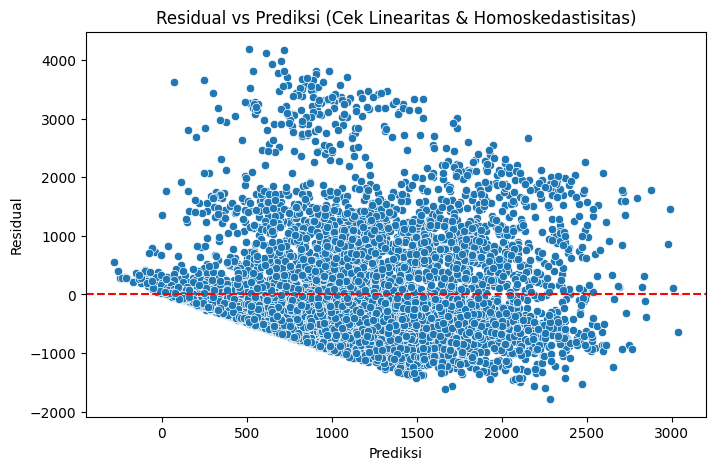

In [230]:
# MEMBUAT SCATTER PLOT RESIDUAL VS PREDIKSI UNTUK EVALUASI MODEL REGRESI (Linearitas & Homoskedastisitas)
# Hitung residual
residuals = y_train - y_pred_lr_train

# Membuat figure baru ukuran 8x5 inci
plt.figure(figsize=(8, 5))

# - x = y_pred_lr_train: Nilai yang diprediksi oleh model regresi pada data training
# - y = residuals: Selisih antara nilai aktual dan prediksi (y_train - y_pred_lr_train)
sns.scatterplot(x=y_pred_lr_train, y=residuals)
plt.axhline(0, color='red', linestyle='--') # Menambahkan garis horizontal di y=0
plt.xlabel("Prediksi")  # Label sumbu x menunjukkan nilai prediksi model
plt.ylabel("Residual")  # Label sumbu y menunjukkan residual
plt.title("Residual vs Prediksi (Cek Linearitas & Homoskedastisitas)")    # Judul plot
plt.show()  # Menampilkan plot

Interpretasi : <br>
- Linearitas<br>
Titik-titik cenderung membentuk pola seperti kerucut horizontal. Tidak tampak kurva atau pola melengkung, jadi asumsi linearitas cukup terpenuhi, tapi tidak sempurna.<br>


- Homoskedastisitas<br>
Terlihat kerucut terbuka ke atas, artinya residual makin besar saat nilai prediksi makin tinggi. Ini adalah indikasi heteroskedastisitas.

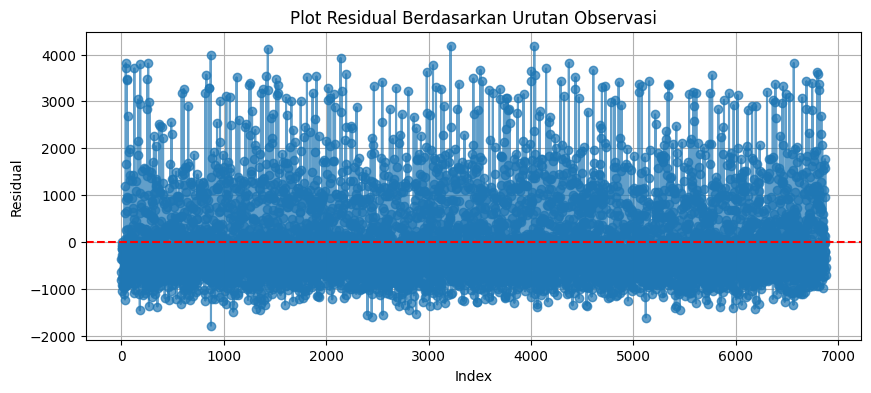

In [231]:
# Plot residual berdasarkan urutan observasi
plt.figure(figsize=(10, 4)) # Ukuran plot
plt.plot(residuals.values, marker='o', linestyle='-', alpha=0.7)  # Plot residual
plt.axhline(0, color='red', linestyle='--') # Garis horizontal di 0
plt.title("Plot Residual Berdasarkan Urutan Observasi")   # Judul plot
plt.xlabel("Index")   # Label sumbu x
plt.ylabel("Residual")    # Label sumbu y
plt.grid(True)    # Tampilkan grid
plt.show()    # Tampilkan plot

Interpretasi: <br>
Dari plot ini, kita tidak melihat pola yang jelas atau berulang secara sistematis.Tidak ada tren naik atau turun yang berlanjut, titik-titik tampak cukup acak. Tidak ada indikasi kuat autokorelasi. Ini mendukung asumsi bahwa error dari model ini tidak saling tergantung antar waktu. tetapi Walau acak, kita bisa lihat bahwa ada banyak lonjakan besar (spike) ke atas dan ke bawah.

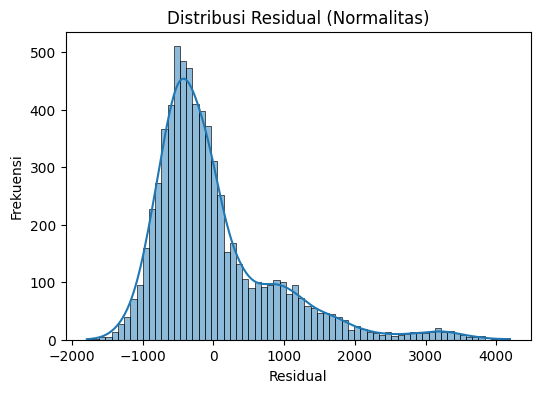

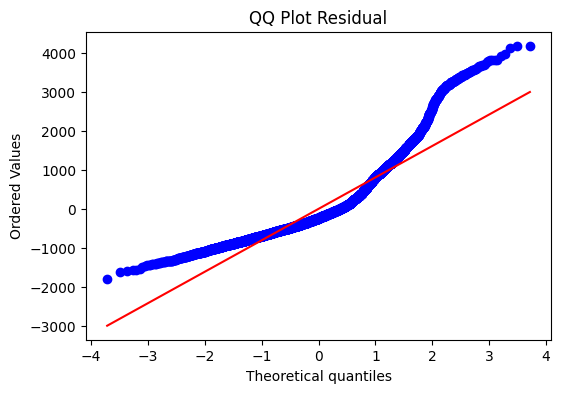

In [232]:
# Histogram residual untuk melihat distribusinya (normalitas)
plt.figure(figsize=(6, 4))    # Ukuran plot
sns.histplot(residuals, kde=True)   # Plot histogram + kurva KDE
plt.title("Distribusi Residual (Normalitas)")   # Judul plot
plt.xlabel("Residual")  # Label sumbu x
plt.ylabel("Frekuensi") # Label sumbu y
plt.show()    # Tampilkan plot

# QQ-plot untuk mengecek apakah residual menyebar normal
plt.figure(figsize=(6, 4))  # Ukuran plot
stats.probplot(residuals, dist="norm", plot=plt)  # QQ plot dengan distribusi normal sebagai referensi
plt.title("QQ Plot Residual")   # Judul plot
plt.show()    # Tampilkan plot

Interpretasi:<br>
- Histogram Distribusi Residual<br>
Residual tidak berdistribusi normal. Ini bisa menjadi indikasi bahwa model ini mungkin kurang tepat, atau terdapat outlier atau fitur yang tidak ditangkap oleh model.<br>

- QQ Plot (Quantile-Quantile Plot)<br>
Pada plot ini, titik-titik menyimpang dari garis lurus, terutama di bagian ekor kiri dan kanan. Ekor kanan jauh di atas garis → menunjukkan adanya outlier positif (prediksi model jauh lebih rendah dari aktual). Ekor kiri sedikit menyimpang → juga menunjukkan ketidaksesuaian dengan distribusi normal.<br>
Berdasarkan kedua plot tersebut, residual model ini tidak mengikuti distribusi normal.

### 11. Artificial Neural Network Model

In [233]:
# Set seed untuk memastikan hasil eksperimen yang konsisten (reproducible)
seed = 42
np.random.seed(seed)    # Seed untuk NumPy
random.seed(seed)  # Seed untuk random bawaan Python
tf.random.set_seed(seed)   # Seed untuk TensorFlow

In [234]:
# Pilih fitur dan target
X_dl = df[['t1', 'hum',	'wind_speed',	'weather_code',	'is_holiday',	'is_weekend',	'season',	'hour',	'month', 'day_num']] # fitur
y_dl = df['cnt']  # target

# Split data
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.2, random_state=seed)

# Normalisasi fitur
scaler = StandardScaler()
X_train_dl = scaler.fit_transform(X_train_dl)
X_test_dl = scaler.transform(X_test_dl)

# Tampilkan jumlah fitur train & test
print("Train shape:", X_train_dl.shape)
print("Test shape:", X_test_dl.shape)

Train shape: (6880, 10)
Test shape: (1720, 10)


In [235]:
# Bangun Arsitektur Model ANN
ann_model = Sequential([
    Dense(64, input_dim=X_train_dl.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
ann_model.summary() #summary model ANN

# Kompilasi model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Latih model
history = ann_model.fit(X_train_dl, y_train_dl, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluasi model di data test
loss, mae = ann_model.evaluate(X_test_dl, y_test_dl, verbose=0)
y_pred_ann = ann_model.predict(X_test_dl).flatten()

# Hitung metrik tambahan
mse_ann = mean_squared_error(y_test_dl, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_test_dl, y_pred_ann)

# Tampilkan hasil evaluasi
print("ANN Performance:")
print(f"Mean Squared Error (MSE): {mse_ann:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ann:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2_ann:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2269517.2500 - mae: 1098.7026 - val_loss: 2231835.7500 - val_mae: 1087.2616
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1992433.1250 - mae: 996.3589 - val_loss: 1394432.5000 - val_mae: 791.6114
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1150579.6250 - mae: 691.5992 - val_loss: 856219.0000 - val_mae: 638.4798
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 817717.2500 - mae: 622.8196 - val_loss: 797584.1875 - val_mae: 644.2459
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 782005.4375 - mae: 632.9931 - val_loss: 780860.0625 - val_mae: 644.6218
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 768835.2500 - mae: 635.6712 - val_loss: 772169.3750 - val_mae: 643.0331
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 760905.9375 - mae: 635.2126 - val_loss: 766272.3125 - val_mae: 640.7767
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 755140.31

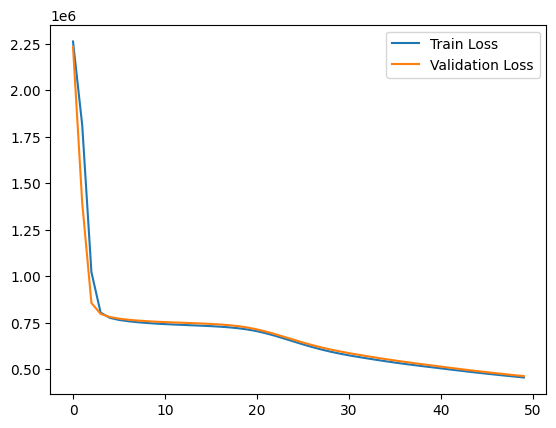

In [236]:
# Plot Hasil Training
# Plot nilai loss pada data pelatihan model ANN
plt.plot(history.history['loss'], label='Train Loss') # 'loss' dari data training setiap epoch

# Plot nilai loss pada data validasi
plt.plot(history.history['val_loss'], label='Validation Loss')  # 'val_loss' dari data validasi setiap epoch
plt.legend()    # Tambahkan legenda untuk membedakan garis
plt.show()    # Tampilkan plot

Hasil:<br>
ANN Performance:<br>
- Mean Squared Error (MSE): 488514.22  
- Root Mean Squared Error (RMSE): 698.94  
- Mean Absolute Error (MAE): 491.19  
- R² Score: 0.5699
<br>

Interpretasi Hasil, kualitas Hasil (Dilihat dari Metrik): <br>
- R² Score: 0.5699 (56.99%), Model mampu menjelaskan 56.99% variasi data (Moderate), Lebih baik dari model linear sebelumnya (R² 0.30)
- RMSE: 698.94, Error absolut rata-rata: ±699 unit sepeda, analisis relatif:

rata-rata y = 1110

Error % =(698.94/1110) x 100% = 63%

Kategori tinggi (error >30% rata-rata data)

Dampak bisnis: Prediksi bisa meleset hingga 63% dari nilai aktual

- MAE: 491.19, Prediksi meleset rata-rata ±491 unit dari nilai sebenarnya.

Model masih underfitting, mungkin karena model terlalu sederhana untuk data ini. kita akan coba menambah layer pada model DNN

In [246]:
erorr = (698.94/1110)*100
print(erorr)

62.96756756756757


In [237]:
# Menampilkan nilai rata-rata (mean) dan nilai maksimum (max) dari target data pelatihan
print(y_train.mean(), y_train.max())

1110.1668604651163 4890


12. Deep Neural Network (DNN) Model

In [238]:
# Bangun model DNN dengan lebih banyak lapisan dan neuron
dnn_model = Sequential([
    Dense(128, input_dim=X_train_dl.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # output layer
])

dnn_model.summary() # summary model DNN

# Kompilasi model
dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Latih model
history_dnn = dnn_model.fit(X_train_dl, y_train_dl, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluasi model di data uji
loss_dnn, mae_dnn = dnn_model.evaluate(X_test_dl, y_test_dl, verbose=0)
y_pred_dnn = dnn_model.predict(X_test_dl).flatten()

# Hitung metrik tambahan
mse_dnn = mean_squared_error(y_test_dl, y_pred_dnn)
rmse_dnn = np.sqrt(mse_dnn)
r2_dnn = r2_score(y_test_dl, y_pred_dnn)

# Tampilkan hasil evaluasi
print("DNN Performance:")
print(f"Mean Squared Error (MSE): {mse_dnn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dnn:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dnn:.2f}")
print(f"R² Score: {r2_dnn:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1985502.8750 - mae: 1006.1689 - val_loss: 790129.5000 - val_mae: 646.8696
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 774797.1875 - mae: 641.0068 - val_loss: 768179.5625 - val_mae: 633.1973
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 754604.0625 - mae: 631.5339 - val_loss: 758384.2500 - val_mae: 626.8007
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 745067.7500 - mae: 626.4429 - val_loss: 751076.6250 - val_mae: 621.5228
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 736993.2500 - mae: 621.4959 - val_loss: 740658.0625 - val_mae: 613.8208
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 722971.8125 - mae: 612.3490 - val_loss: 710779.3125 - val_mae: 593.6315
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 681412.7500 - mae: 587.8818 - val_loss: 642412.6250 - val_mae: 558.7086
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 606183

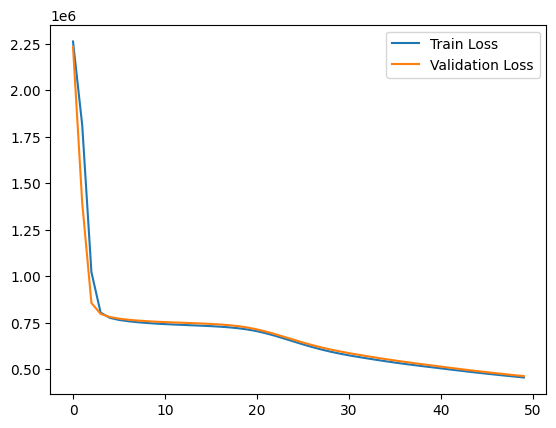

In [239]:
# Plot Hasil Training
# Plot nilai loss pada data pelatihan model DNN
plt.plot(history.history['loss'], label='Train Loss') # 'loss' dari data training setiap epoch

# Plot nilai loss pada data validasi
plt.plot(history.history['val_loss'], label='Validation Loss')    # 'val_loss' dari data validasi setiap epoch
plt.legend()    # Tambahkan legenda untuk membedakan garis
plt.show()    # Tampilkan plot

DNN Performance:
- Mean Squared Error (MSE): 58,176.41  
- Root Mean Squared Error (RMSE): 241.20  
- Mean Absolute Error (MAE): 155.70  
- R² Score: 0.9488 (94.88%)


Interpretasi Metrik :
- R² Score: 0.9488, Kualitas Sangat Baik (Excellent), Model mampu menjelaskan 94.88% variasi data, Hanya 5.12% variasi yang tidak terjelaskan
- RMSE: 241.20, Error absolut rata-rata: ±241 unit sepeda, analisis relatif: rata-rata y = 1110

Error % = (241.20/1110) x 100% = 21%

Kategori Baik (error <25% rata-rata data)

- MAE: 155.70, Prediksi meleset rata-rata ±156 unit dari nilai sebenarnya.

In [249]:
erorr_dnn =(241.20/1110) * 100
print(erorr_dnn)

21.72972972972973


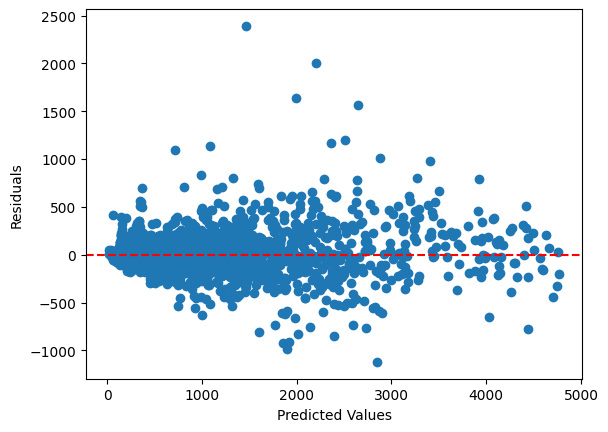

In [240]:
# Menghitung residual dari prediksi model DNN (selisih antara nilai aktual dan prediksi)
residuals = y_test_dl - y_pred_dnn
plt.scatter(y_pred_dnn, residuals)  # Scatter plot antara nilai prediksi dan residual
plt.axhline(y=0, color='r', linestyle='--')   # Tambahkan garis horizontal di y = 0 sebagai referensi
plt.xlabel("Predicted Values")    # Sumbu x: nilai prediksi dari model
plt.ylabel("Residuals")   # Sumbu y: selisih antara nilai aktual dan prediksi
plt.show()    # Tampilkan plot

Interpretasi Residual Plot:

- Residual tersebar tidak merata, membentuk pola "corong" (heteroskedastisitas).
- Varians error meningkat seiring naiknya nilai prediksi (predicted values), menunjukkan ketidakstabilan model pada nilai tinggi.
- Terdapat residual hingga ±4000, mengindikasikan prediksi yang meleset jauh untuk beberapa data point.
- Residual tidak terdistribusi acak di sekitar garis 0 (Bias Sistemik)

- Metrik (R² Score 0.9488, RMSE 241.20) menunjukkan performa sangat baik, tetapi residual plot mengungkap masalah serius:

- Heteroskedastisitas (varians error tidak konsisten).

- Outlier ekstrem (beberapa prediksi meleset hingga ±4000 unit).

- Diagnosa Utama:
Model hanya akurat untuk rentang nilai tertentu (prediksi di kisaran menengah), tetapi gagal memprediksi nilai ekstrem (>3500) dengan konsisten, error membesar seiring meningkatnya nilai prediksi (efek "corong").

- Keputusan Penggunaan Model:
Bisa dipakai untuk prediksi nilai rentang menengah (misal: 500–2000 unit). Tidak direkomendasikan untuk prediksi nilai ekstrem (>3500) tanpa perbaikan lebih lanjut. Model ini secara numerik tampak baik, tetapi masalah stabilitas prediksi terlihat dari residual plot.

Sejauh ini, Model DNN menjadi model terbaik (dari pada linear regression dan ANN)